In [1]:
"""Analysis of Volumetric Architectures"""
import sys

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fsize = 18
params = {'legend.fontsize': fsize*0.8,          
          'axes.labelsize': fsize*0.8,
          'axes.titlesize':fsize,
          'xtick.labelsize':fsize*0.8,
          'ytick.labelsize':fsize*0.8,
          'savefig.dpi': 1000}
sns.set(palette='pastel', rc=params)

import os
import numpy as np
import scipy.io as sio

import seaborn as sns

import analysis_funcs as af
import analysis_utils as autils
import stats
import exp_filepaths as ef

sys.path.append('../')
from utils import io_utils

bar_graph_kwargs = {'spacing': 1.0, 'sig_marker_size': 15}

/home/arjundd/anaconda3/envs/tf_36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# volumetric architecture experiments
VOLUME_2D = ef.VOLUME_2D
VOLUME_2_5D_3 = ef.NDS_UNET_2_5D_3
VOLUME_2_5D_5 = ef.NDS_UNET_2_5D_5
VOLUME_2_5D_7 = ef.NDS_UNET_2_5D_7
VOLUME_3D_4 = ef.VOLUME_3D_4
VOLUME_3D_8 = ef.VOLUME_3D_8
VOLUME_3D_16 = ef.VOLUME_3D_16
VOLUME_3D_32 = ef.VOLUME_3D_32

VOLUMES = {'filename': 'volume',
         'keys': ['2D', '2.5D (3)', '2.5D (5)', '2.5D (7)', '3D (4)', '3D (8)', '3D (16)', '3D (32)'],
         '2D': VOLUME_2D, '2.5D (3)': VOLUME_2_5D_3, '2.5D (5)': VOLUME_2_5D_5, '2.5D (7)': VOLUME_2_5D_7,
          '3D (4)': VOLUME_3D_4, '3D (8)': VOLUME_3D_8, '3D (16)': VOLUME_3D_16, '3D (32)': VOLUME_3D_32}

data_folder = io_utils.check_dir('/bmrNAS/people/arjun/msk_seg_networks/analysis/vol-architectures')
cpal_muted = sns.color_palette("muted", 8)
cpal_pastel = sns.color_palette("pastel", 8)

dsc:


,2D,2.5D (3),2.5D (5),2.5D (7),3D (4),3D (8),3D (16),3D (32)
2D,-1.000000e+00,1.000000,1.000000e+00,1.000000,0.000006,7.192713e-08,0.000688,0.006156
2.5D (3),1.000000e+00,-1.000000,1.000000e+00,1.000000,0.001024,2.809362e-05,0.045288,0.239778
2.5D (5),1.000000e+00,1.000000,-1.000000e+00,1.000000,0.000024,3.666224e-07,0.002220,0.017350
2.5D (7),1.000000e+00,1.000000,1.000000e+00,-1.000000,0.000163,3.330149e-06,0.010508,0.067764
3D (4),5.760247e-06,0.001024,2.399689e-05,0.000163,-1.000000,1.000000e+00,1.000000,1.000000
3D (8),7.192713e-08,0.000028,3.666224e-07,0.000003,1.000000,-1.000000e+00,1.000000,0.663569
3D (16),6.877551e-04,0.045288,2.219513e-03,0.010508,1.000000,1.000000e+00,-1.000000,1.000000
3D (32),6.155819e-03,0.239778,1.735033e-02,0.067764,1.000000,6.635690e-01,1.000000,-1.000000



voe:


,2D,2.5D (3),2.5D (5),2.5D (7),3D (4),3D (8),3D (16),3D (32)
2D,-1.000000e+00,1.000000,1.000000e+00,1.000000,0.000006,7.192713e-08,0.000688,0.006156
2.5D (3),1.000000e+00,-1.000000,1.000000e+00,1.000000,0.001024,2.809362e-05,0.045288,0.239778
2.5D (5),1.000000e+00,1.000000,-1.000000e+00,1.000000,0.000024,3.666224e-07,0.002220,0.017350
2.5D (7),1.000000e+00,1.000000,1.000000e+00,-1.000000,0.000163,3.330149e-06,0.010508,0.067764
3D (4),5.760247e-06,0.001024,2.399689e-05,0.000163,-1.000000,1.000000e+00,1.000000,1.000000
3D (8),7.192713e-08,0.000028,3.666224e-07,0.000003,1.000000,-1.000000e+00,1.000000,0.663569
3D (16),6.877551e-04,0.045288,2.219513e-03,0.010508,1.000000,1.000000e+00,-1.000000,1.000000
3D (32),6.155819e-03,0.239778,1.735033e-02,0.067764,1.000000,6.635690e-01,1.000000,-1.000000



cv:


,2D,2.5D (3),2.5D (5),2.5D (7),3D (4),3D (8),3D (16),3D (32)
2D,-1.000000,1.0,1.0,1.0,0.82886,1.0,0.997597,1.0
2.5D (3),1.000000,-1.0,1.0,1.0,1.00000,1.0,1.000000,1.0
2.5D (5),1.000000,1.0,-1.0,1.0,1.00000,1.0,1.000000,1.0
2.5D (7),1.000000,1.0,1.0,-1.0,1.00000,1.0,1.000000,1.0
3D (4),0.828860,1.0,1.0,1.0,-1.00000,1.0,1.000000,1.0
3D (8),1.000000,1.0,1.0,1.0,1.00000,-1.0,1.000000,1.0
3D (16),0.997597,1.0,1.0,1.0,1.00000,1.0,-1.000000,1.0
3D (32),1.000000,1.0,1.0,1.0,1.00000,1.0,1.000000,-1.0



assd:


,2D,2.5D (3),2.5D (5),2.5D (7),3D (4),3D (8),3D (16),3D (32)
2D,-1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000012,0.000291,6.935115e-13,1.830752e-07
2.5D (3),1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,0.022571,0.192270,9.133503e-08,1.171277e-03
2.5D (5),1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+00,0.000006,0.000168,2.770183e-13,9.019726e-08
2.5D (7),1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.009411,0.092405,2.130148e-08,4.133756e-04
3D (4),1.199180e-05,2.257065e-02,6.433981e-06,9.410831e-03,-1.000000,1.000000,2.871098e-01,1.000000e+00
3D (8),2.914739e-04,1.922701e-01,1.682987e-04,9.240476e-02,1.000000,-1.000000,3.657491e-02,1.000000e+00
3D (16),6.935115e-13,9.133503e-08,2.770183e-13,2.130148e-08,0.287110,0.036575,-1.000000e+00,1.000000e+00
3D (32),1.830752e-07,1.171277e-03,9.019726e-08,4.133756e-04,1.000000,1.000000,1.000000e+00,-1.000000e+00


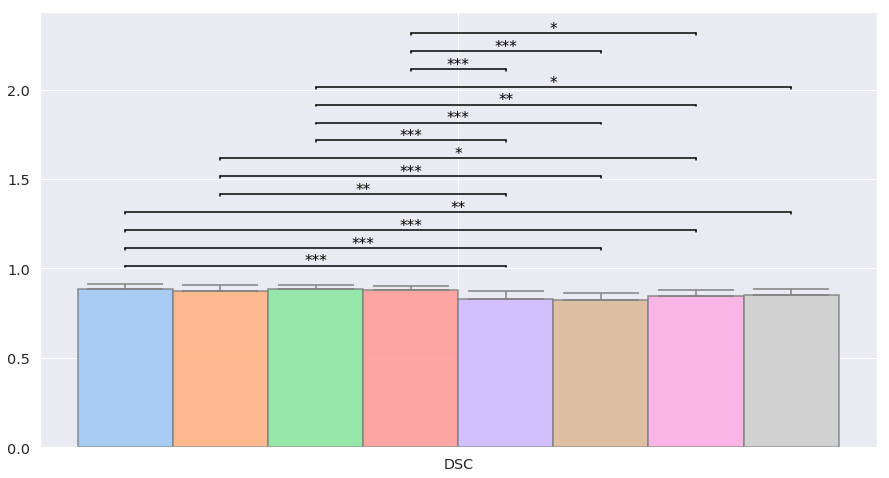

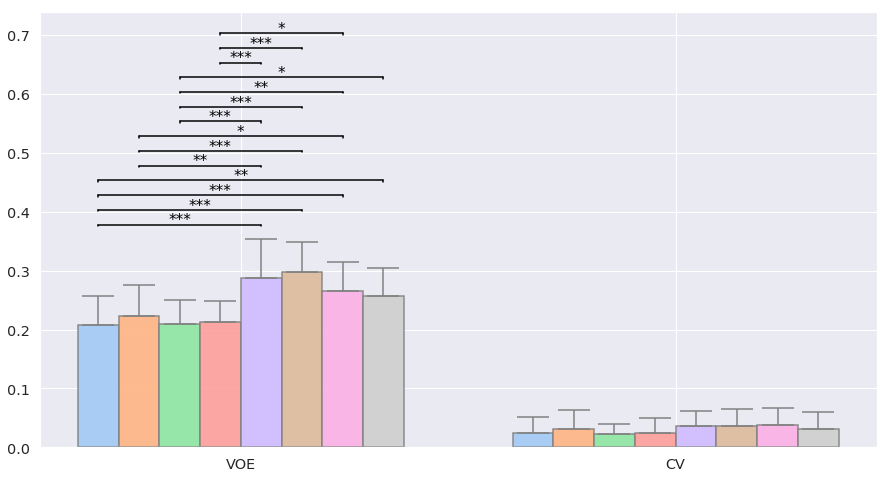

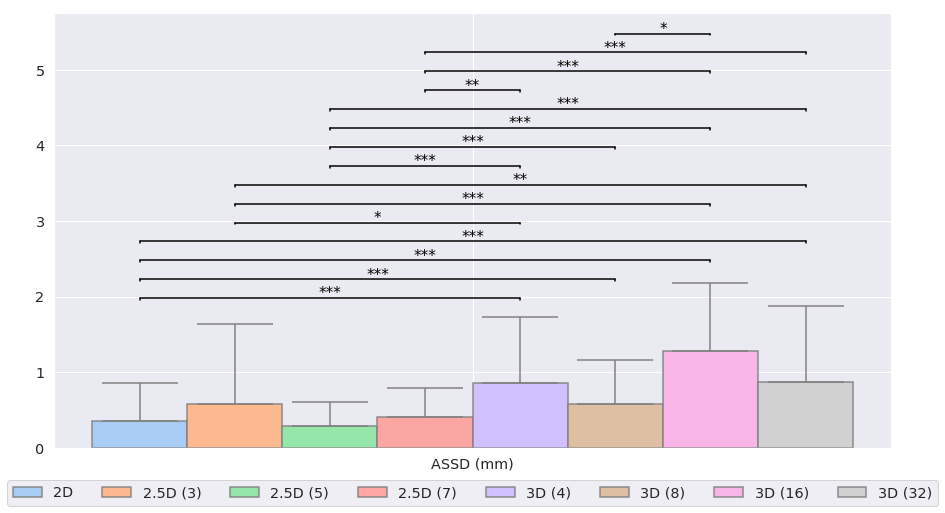

In [3]:
# Analyze all volumetric experiments compared to each other
volumes_all = [VOLUME_2D, VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7, 
               VOLUME_3D_4, VOLUME_3D_8, VOLUME_3D_16, VOLUME_3D_32]
pmats_vol = stats.kruskal_dunn_analysis(volumes_all, 
                                        VOLUMES['keys'])

bar_graph_kwargs = {'spacing': 1.0, 'sig_marker_size': 15, 'cpal': cpal_pastel}
matplotlib.rcParams['figure.figsize'] = [15.0, 8.0]

autils.compare_metrics(volumes_all, 
                       VOLUMES['keys'], metrics=('dsc', ), p_sig_matrix=[pmats_vol[0]], **bar_graph_kwargs)
autils.compare_metrics(volumes_all, 
                       VOLUMES['keys'], metrics=('voe', 'cv'), p_sig_matrix=pmats_vol[1:3], **bar_graph_kwargs)
autils.compare_metrics(volumes_all, 
                       VOLUMES['keys'], metrics=('assd',), p_sig_matrix=[pmats_vol[3]], **bar_graph_kwargs)
plt.legend(loc='lower center', bbox_to_anchor= (0.5, -0.15), ncol=len(VOLUMES['keys']))

dsc:


,2.5D (3),2.5D (5),2.5D (7)
2.5D (3),-1.0,1.0,1.0
2.5D (5),1.0,-1.0,1.0
2.5D (7),1.0,1.0,-1.0



voe:


,2.5D (3),2.5D (5),2.5D (7)
2.5D (3),-1.0,1.0,1.0
2.5D (5),1.0,-1.0,1.0
2.5D (7),1.0,1.0,-1.0



cv:


,2.5D (3),2.5D (5),2.5D (7)
2.5D (3),-1.0,1.0,1.0
2.5D (5),1.0,-1.0,1.0
2.5D (7),1.0,1.0,-1.0



assd:


,2.5D (3),2.5D (5),2.5D (7)
2.5D (3),-1.000000,0.277797,1.000000
2.5D (5),0.277797,-1.000000,0.230433
2.5D (7),1.000000,0.230433,-1.000000


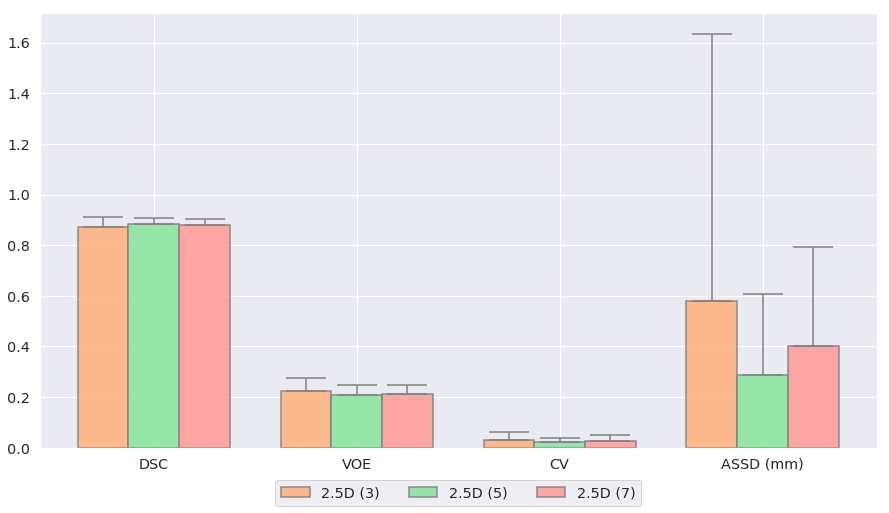

In [4]:
volumes_25d = [VOLUME_2_5D_3, VOLUME_2_5D_5, VOLUME_2_5D_7]
volumes_25d_names = VOLUMES['keys'][1:4]
cpal_25d = sns.color_palette("muted", 8)[1:4]

bar_graph_kwargs = {'spacing': 1.0, 'sig_marker_size': 15, 'cpal': cpal_pastel[1:4]}
matplotlib.rcParams['figure.figsize'] = [15.0, 8.0]

pmats_vol = stats.kruskal_dunn_analysis(volumes_25d, 
                                        volumes_25d_names)

matplotlib.rcParams['figure.figsize'] = [15.0, 8.0]
autils.compare_metrics(volumes_25d, 
                       volumes_25d_names, metrics=('dsc', 'voe', 'cv', 'assd'), 
                       p_sig_matrix=pmats_vol, **bar_graph_kwargs)
plt.legend(loc='lower center', bbox_to_anchor= (0.5, -0.15), ncol=len(VOLUMES['keys']))

dsc:


,3D (4),3D (8),3D (16),3D (32)
3D (4),-1.000000,1.000000,1.000000,0.295187
3D (8),1.000000,-1.000000,0.242674,0.038698
3D (16),1.000000,0.242674,-1.000000,1.000000
3D (32),0.295187,0.038698,1.000000,-1.000000



voe:


,3D (4),3D (8),3D (16),3D (32)
3D (4),-1.000000,1.000000,1.000000,0.295187
3D (8),1.000000,-1.000000,0.242674,0.038698
3D (16),1.000000,0.242674,-1.000000,1.000000
3D (32),0.295187,0.038698,1.000000,-1.000000



cv:


,3D (4),3D (8),3D (16),3D (32)
3D (4),-1.0,1.0,1.0,1.0
3D (8),1.0,-1.0,1.0,1.0
3D (16),1.0,1.0,-1.0,1.0
3D (32),1.0,1.0,1.0,-1.0



assd:


,3D (4),3D (8),3D (16),3D (32)
3D (4),-1.000000,1.000000e+00,1.063705e-04,1.000000
3D (8),1.000000,-1.000000e+00,2.722166e-07,0.080392
3D (16),0.000106,2.722166e-07,-1.000000e+00,0.016436
3D (32),1.000000,8.039211e-02,1.643584e-02,-1.000000


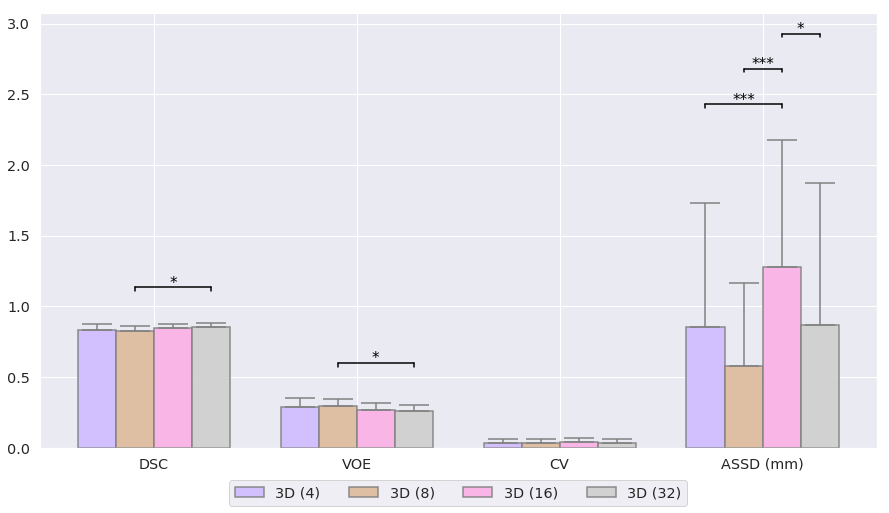

In [5]:
volumes_3d = [VOLUME_3D_4, VOLUME_3D_8, VOLUME_3D_16, VOLUME_3D_32]
volume_3d_names = VOLUMES['keys'][4:]
pmats_vol = stats.kruskal_dunn_analysis(volumes_3d, 
                                        volume_3d_names)

bar_graph_kwargs = {'spacing': 1.0, 'sig_marker_size': 15, 'cpal': cpal_pastel[4:]}
matplotlib.rcParams['figure.figsize'] = [15.0, 8.0]

autils.compare_metrics(volumes_3d, 
                       volume_3d_names, metrics=('dsc', 'voe', 'cv', 'assd'), 
                       p_sig_matrix=pmats_vol, **bar_graph_kwargs)
plt.legend(loc='lower center', bbox_to_anchor= (0.5, -0.15), ncol=len(VOLUMES['keys']))

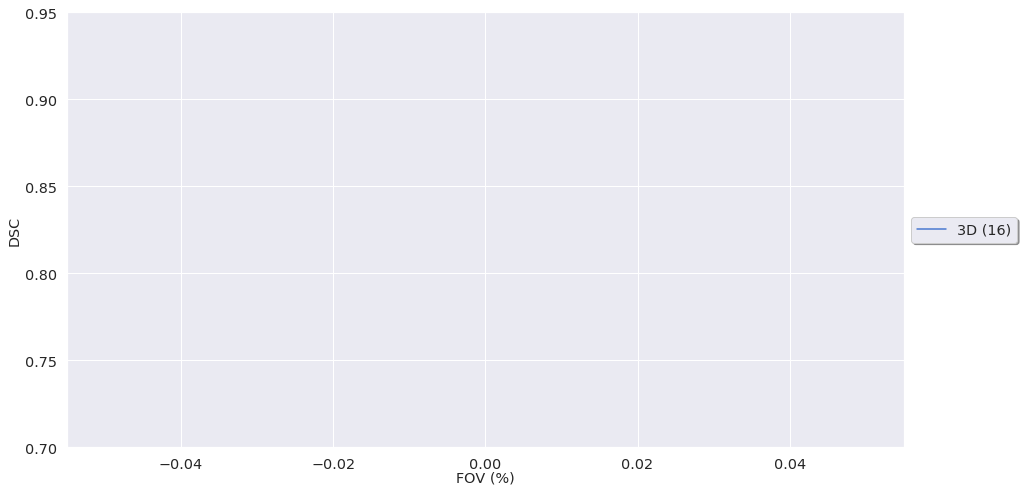

In [9]:
VOLUMES = {'keys': ['2D', '2.5D (3)', '2.5D (5)', '2.5D (7)', '3D (4)', '3D (8)', '3D (16)', '3D (32)'],
         '2D': VOLUME_2D, '2.5D (3)': VOLUME_2_5D_3, '2.5D (5)': VOLUME_2_5D_5, '2.5D (7)': VOLUME_2_5D_7,
          '3D (4)': VOLUME_3D_4, '3D (8)': VOLUME_3D_8, '3D (16)': VOLUME_3D_16, '3D (32)': VOLUME_3D_32}
VOLUMES = {'keys': ['3D (16)'],
         '2D': VOLUME_2D, '2.5D (3)': VOLUME_2_5D_3, '2.5D (5)': VOLUME_2_5D_5, '2.5D (7)': VOLUME_2_5D_7,
          '3D (4)': VOLUME_3D_4, '3D (8)': VOLUME_3D_8, '3D (16)': VOLUME_3D_16, '3D (32)': VOLUME_3D_32}

af.graph_slice_exp(VOLUMES, True, title='', show_error=False, ylim=[0.70, 0.95])